In [1]:
import pandas as pd
import matplotlib as plot
import numpy as plt

In [2]:
df_Ecommers = pd.read_csv(r"C:\Users\robin\Desktop\ecommerce_dataset_updated.csv", encoding="latin-1")

--------------
# Analisis EDA
--------------

In [4]:
df_Ecommers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB


In [5]:
df_Ecommers.head()

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01-04-2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024


In [6]:
df_Ecommers.isnull().sum()

User_ID             0
Product_ID          0
Category            0
Price (Rs.)         0
Discount (%)        0
Final_Price(Rs.)    0
Payment_Method      0
Purchase_Date       0
dtype: int64

In [7]:
df_Ecommers.duplicated().sum()

0

# 2)

In [9]:
# categoria mas vendida
df_Ecommers['Category'].value_counts()

Category
Home & Kitchen    549
Books             534
Clothing          531
Toys              523
Sports            520
Beauty            505
Electronics       498
Name: count, dtype: int64

In [8]:
df_Ecommers.describe()

,Price (Rs.),Discount (%),Final_Price(Rs.)
count,3660.000000,3660.000000,3660.000000
mean,254.800675,18.825137,206.906579
std,141.682621,14.731338,122.687844
min,10.090000,0.000000,5.890000
25%,134.012500,5.000000,104.512500
50%,253.845000,15.000000,199.185000
75%,377.595000,25.000000,304.117500
max,499.960000,50.000000,496.820000


In [10]:
# categorias que generan mas dinero
df_Ecommers.groupby('Category')['Final_Price(Rs.)'].sum().sort_values(ascending = False)

Category
Clothing          115314.84
Books             111149.35
Home & Kitchen    110328.08
Sports            108518.79
Toys              107289.69
Beauty            104215.10
Electronics       100462.23
Name: Final_Price(Rs.), dtype: float64

In [11]:
# numero de clientes unicos
df_Ecommers['User_ID'].nunique()

3660

# 3) 

In [12]:
# clientes que compraron mas veces
df_Ecommers['User_ID'].value_counts().head(10)

User_ID
337c166f    1
c0d0e868    1
5f0bbdfb    1
dd7cd6f2    1
3bdcafad    1
847a300e    1
681e2800    1
4d77d1d3    1
18ceee25    1
22cc7cea    1
Name: count, dtype: int64

In [13]:
# promedio de descuento por cliente
df_Ecommers.groupby('User_ID')['Discount (%)'].mean().sort_values(ascending=False)

User_ID
be4d0858    50.0
329b7c97    50.0
c44db413    50.0
c4486290    50.0
c4367af6    50.0
            ... 
e6cbe081     0.0
4ec6ded9     0.0
4eada12f     0.0
ba80beba     0.0
39d11da5     0.0
Name: Discount (%), Length: 3660, dtype: float64

In [14]:
# clientes que no usaron descuentos
df_Ecommers[df_Ecommers['Discount (%)'] == 0]['User_ID'].unique()

array(['4578c08e', 'ba3964fa', '78595586', '195e0c14', '97f18950',
       '005258a0', 'd5daed7a', '0b204db3', '158e8085', '0ac5e876',
       '7a5f0316', '83732a37', '6b395741', '367debf4', '6b4ec06c',
       '313b6efb', '2ea44e9d', '173a7d55', 'f2c0a566', '2da125c1',
       'd6b94141', '823e9a88', 'b6df8c21', '38a1e970', 'c34605d2',
       'aec17f43', 'c2eefc6e', '5984c518', 'e0f55269', 'abb2fa33',
       'd799d699', '7bad321f', 'cf78ab9a', '39d11da5', '70f75830',
       'cab404e5', '4eada12f', '6531579c', '43fbc7a3', '5c4cc9cd',
       'aeb09719', '8ee04e56', 'd8adad87', '3421e7ba', '24af6c3e',
       'f14cd9dc', '09ed6fb4', '66ab38ee', '0f8a805d', '6e2c9c02',
       '5767f51e', '187108d8', '18571441', '52b9a923', '0e01eaf1',
       'b5603d04', '1a80943e', 'db68c3eb', '3c8ad6d6', '9cb99a90',
       'b755ad6c', 'e4aa32a0', 'a577d4b8', 'fb8277c8', '7da79df6',
       '7d7f6ad1', 'd60ab6ad', 'f5e44697', '1d146f4a', 'c5481eba',
       'd9b16d55', '13d4dd27', '57dcfe4f', '48091eea', 'd31290

In [15]:
df_Ecommers['Discount (%)'].value_counts().loc[[0, 5, 15, 25, 50]]


Discount (%)
0     480
5     470
15    474
25    412
50    430
Name: count, dtype: int64

In [16]:
df_Ecommers['Discount (%)'].value_counts(normalize=True).loc[[0, 5, 15, 25, 50]] * 100


Discount (%)
0     13.114754
5     12.841530
15    12.950820
25    11.256831
50    11.748634
Name: proportion, dtype: float64

In [17]:
descuentos_especificos = [0, 5, 15, 25, 50]

tabla_descuentos = (
    df_Ecommers['Discount (%)']
    .value_counts()
    .reindex(descuentos_especificos, fill_value=0)
    .to_frame('Cantidad')
)

tabla_descuentos['Porcentaje (%)'] = (
    df_Ecommers['Discount (%)']
    .value_counts(normalize=True)
    .reindex(descuentos_especificos, fill_value=0) * 100
)

tabla_descuentos


,Cantidad,Porcentaje (%)
Discount (%),,
0,480,13.114754
5,470,12.841530
15,474,12.950820
25,412,11.256831
50,430,11.748634


# 4)

In [18]:
# Transformamos la columna purchase date en date-time
df_Ecommers['Purchase_Date']= pd.to_datetime(df_Ecommers['Purchase_Date'],format='%d-%m-%Y')

In [19]:
# Crearmos la columna "Month"
df_Ecommers['Month'] = df_Ecommers['Purchase_Date'].dt.to_period('M')

In [22]:
df_Ecommers.groupby('Month')['Final_Price(Rs.)'].sum()

Month
2024-01    69009.43
2024-02    69186.34
2024-03    71325.40
2024-04    74365.13
2024-05    68837.25
2024-06    64256.66
2024-07    72798.23
2024-08    71506.96
2024-09    68043.09
2024-10    76034.51
2024-11    51915.08
Freq: M, Name: Final_Price(Rs.), dtype: float64

In [26]:
df_Ecommers['Purchase_Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3660 entries, 0 to 3659
Series name: Purchase_Date
Non-Null Count  Dtype         
--------------  -----         
3660 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 28.7 KB


In [30]:
# Creamos la columna "Month"
df_Ecommers['Month'] = df_Ecommers['Purchase_Date'].dt.to_period('M')


In [38]:
# Analizamos ingresos por mes
df_Ecommers.groupby('Month')['Final_Price(Rs.)'].sum()

Month
2024-01    69009.43
2024-02    69186.34
2024-03    71325.40
2024-04    74365.13
2024-05    68837.25
2024-06    64256.66
2024-07    72798.23
2024-08    71506.96
2024-09    68043.09
2024-10    76034.51
2024-11    51915.08
Freq: M, Name: Final_Price(Rs.), dtype: float64

In [44]:
# Descuento promedio por categoria
df_Ecommers.groupby('Category')['Discount (%)'].mean().sort_values(ascending=False)

Category
Home & Kitchen    19.608379
Sports            19.326923
Electronics       19.267068
Books             19.035581
Beauty            18.475248
Toys              18.126195
Clothing          17.919021
Name: Discount (%), dtype: float64

# Analisis cruzado 1)Descuento por categoria vs 2)Ingresos generado por categoria

In [47]:
#creamos tabla 1
descuento_por_categoria = df_Ecommers.groupby('Category')['Discount (%)'].mean()

In [49]:
#creamos tabla 2
ingresos_por_categoria = df_Ecommers.groupby('Category')['Final_Price(Rs.)'].sum()

In [53]:
# Combinamos resultados
analisis_cruzado = pd.DataFrame({
    'Ingresos_totales':ingresos_por_categoria,
    'Descuento_promedio':descuento_por_categoria
}).sort_values(by='Ingresos_totales',ascending=False)
analisis_cruzado

,Ingresos_totales,Descuento_promedio
Category,,
Clothing,115314.84,17.919021
Books,111149.35,19.035581
Home & Kitchen,110328.08,19.608379
Sports,108518.79,19.326923
Toys,107289.69,18.126195
Beauty,104215.10,18.475248
Electronics,100462.23,19.267068


# Clustering

In [56]:
#1) Seleccionamos solo las columnas utiles para segmentar clientes

X = df_Ecommers[['Final_Price(Rs.)','Discount (%)','Category']].copy()

# 2) Convertimos Category (texto) a columnas binarias (one-hot encoding)
#    Ej: Category_Books = 1 si el cliente compró Books, si no 0.
X = pd.get_dummies(X, columns=['Category'], drop_first=False)

In [58]:
# fit_transform() aprende cómo se distribuyen tus variables y las escala.
# Los valores extremos siguen existiendo, pero no distorsionan tanto.
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

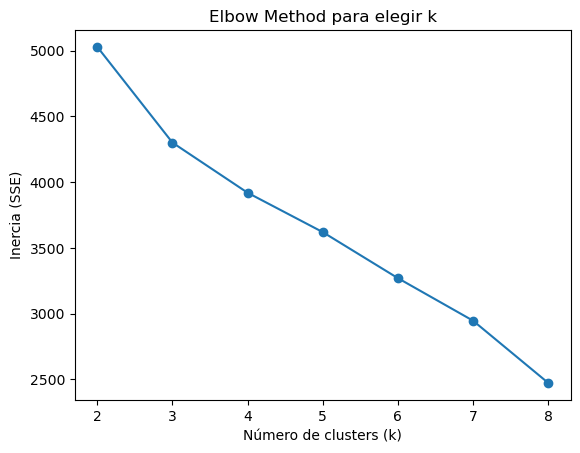

In [59]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_values = range(2, 9)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (SSE)')
plt.title('Elbow Method para elegir k')
plt.show()


In [60]:
# Entrenamos KMeans con k = 3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Asignamos el cluster a cada cliente
df_Ecommers['Cluster'] = kmeans.fit_predict(X_scaled)

df_Ecommers[['Final_Price(Rs.)', 'Discount (%)', 'Category', 'Cluster']].head()

,Final_Price(Rs.),Discount (%),Category,Cluster
0,31.05,15,Sports,2
1,186.23,20,Clothing,2
2,237.76,25,Sports,1
3,129.89,25,Toys,2
4,195.84,20,Beauty,2


In [61]:
perfil_clusters = (
    df_Ecommers
    .groupby('Cluster')
    .agg(
        clientes=('User_ID', 'count'),
        gasto_promedio=('Final_Price(Rs.)', 'mean'),
        descuento_promedio=('Discount (%)', 'mean')
    )
    .round(2)
)

perfil_clusters


,clientes,gasto_promedio,descuento_promedio
Cluster,,,
0,799,138.65,40.76
1,1429,334.55,11.72
2,1432,117.61,13.67


In [62]:
perfil_categoria = (
    df_Ecommers
    .groupby('Cluster')['Category']
    .value_counts(normalize=True)
    .rename('Proporcion')
    .reset_index()
    .sort_values(['Cluster', 'Proporcion'], ascending=[True, False])
)

perfil_categoria.head(15)


,Cluster,Category,Proporcion
0,0,Home & Kitchen,0.165207
1,0,Sports,0.156446
2,0,Electronics,0.143930
3,0,Books,0.141427
4,0,Beauty,0.140175
5,0,Toys,0.135169
6,0,Clothing,0.117647
7,1,Clothing,0.165150
8,1,Books,0.145556
9,1,Beauty,0.143457


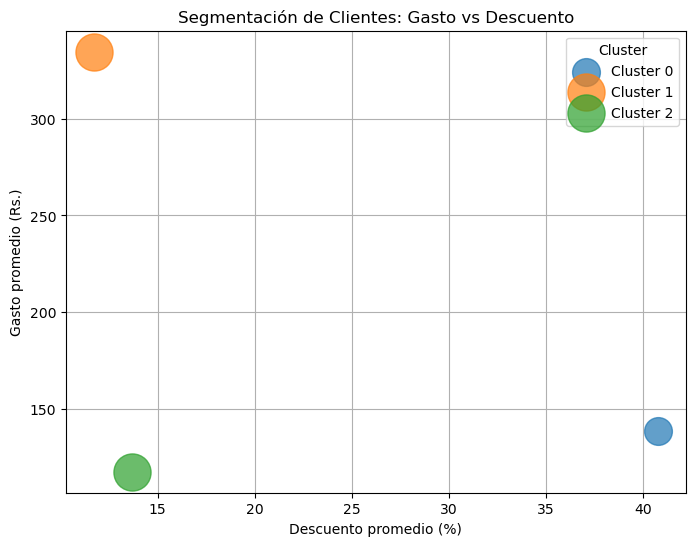

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for cluster in perfil_clusters.index:
    plt.scatter(
        perfil_clusters.loc[cluster, 'descuento_promedio'],
        perfil_clusters.loc[cluster, 'gasto_promedio'],
        s=perfil_clusters.loc[cluster, 'clientes'] / 2,  # tamaño según clientes
        label=f'Cluster {cluster}',
        alpha=0.7
    )

plt.xlabel('Descuento promedio (%)')
plt.ylabel('Gasto promedio (Rs.)')
plt.title('Segmentación de Clientes: Gasto vs Descuento')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


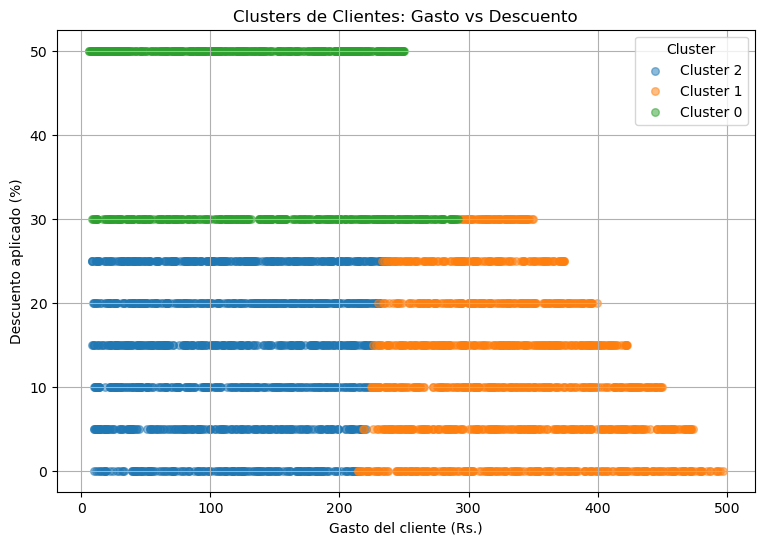

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))

clusters = df_Ecommers['Cluster'].unique()

for c in clusters:
    subset = df_Ecommers[df_Ecommers['Cluster'] == c]
    plt.scatter(
        subset['Final_Price(Rs.)'],
        subset['Discount (%)'],
        alpha=0.5,
        label=f'Cluster {c}',
        s=30
    )

plt.xlabel('Gasto del cliente (Rs.)')
plt.ylabel('Descuento aplicado (%)')
plt.title('Clusters de Clientes: Gasto vs Descuento')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()




In [65]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled, df_Ecommers['Cluster'])
silhouette_avg


0.17742752655042868

In [66]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = {}

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores[k] = score

silhouette_scores


{2: 0.19691399109930025,
 3: 0.17742752655042868,
 4: 0.16425898674723347,
 5: 0.23452064738794345,
 6: 0.27119873882293805}

In [67]:
# Analisis paymetod
df_Ecommers['Payment_Method'].value_counts(normalize=True) * 100

Payment_Method
Credit Card         20.765027
UPI                 20.683060
Debit Card          19.972678
Net Banking         19.562842
Cash on Delivery    19.016393
Name: proportion, dtype: float64

In [68]:
payment_by_cluster = (
    df_Ecommers
    .groupby('Cluster')['Payment_Method']
    .value_counts(normalize=True)
    .rename('Proporcion')
    .reset_index()
    .sort_values(['Cluster', 'Proporcion'], ascending=[True, False])
)

payment_by_cluster


,Cluster,Payment_Method,Proporcion
0,0,UPI,0.224030
1,0,Net Banking,0.210263
2,0,Debit Card,0.204005
3,0,Credit Card,0.195244
4,0,Cash on Delivery,0.166458
5,1,Debit Card,0.206438
6,1,Credit Card,0.202939
7,1,UPI,0.201540
8,1,Cash on Delivery,0.200840
9,1,Net Banking,0.188244


In [69]:
promo_base = (
    df_Ecommers
    .groupby('Category')
    .agg(
        ingresos=('Final_Price(Rs.)', 'sum'),
        ventas=('User_ID', 'count'),
        descuento_promedio=('Discount (%)', 'mean')
    )
    .round(2)
    .sort_values('ingresos', ascending=False)
)
promo_base


,ingresos,ventas,descuento_promedio
Category,,,
Clothing,115314.84,531,17.92
Books,111149.35,534,19.04
Home & Kitchen,110328.08,549,19.61
Sports,108518.79,520,19.33
Toys,107289.69,523,18.13
Beauty,104215.10,505,18.48
Electronics,100462.23,498,19.27


In [70]:
df_Ecommers['Month'] = df_Ecommers['Purchase_Date'].dt.to_period('M')

In [71]:
ingresos_por_mes = (
    df_Ecommers
    .groupby('Month')['Final_Price(Rs.)']
    .sum()
    .round(2)
)

ingresos_por_mes


Month
2024-01    69009.43
2024-02    69186.34
2024-03    71325.40
2024-04    74365.13
2024-05    68837.25
2024-06    64256.66
2024-07    72798.23
2024-08    71506.96
2024-09    68043.09
2024-10    76034.51
2024-11    51915.08
Freq: M, Name: Final_Price(Rs.), dtype: float64

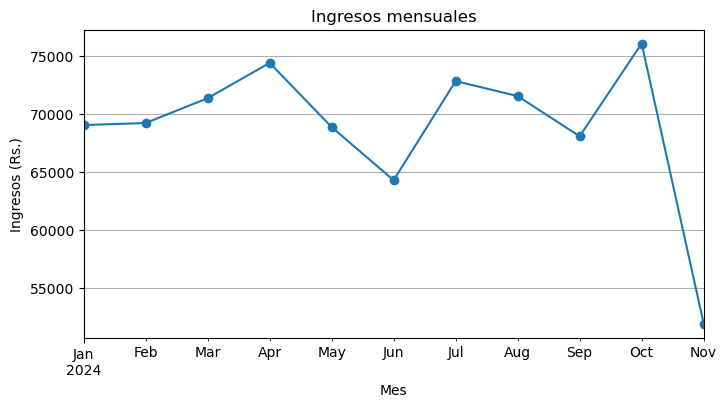

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
ingresos_por_mes.plot(marker='o')
plt.title('Ingresos mensuales')
plt.xlabel('Mes')
plt.ylabel('Ingresos (Rs.)')
plt.grid(True)
plt.show()
